## 15-04-2025

In [17]:
#Sentiment Analysis using Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv(r"C:\Users\91805\Downloads\NLP\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
29994,"I enjoyed the first ""Toxic Avenger,"" but the s...",negative
29995,"New York, I Love You finally makes it to our s...",positive
29996,This movie makes you wish imdb would let you v...,negative
29997,"Space Camp, which had the unfortunate luck to ...",negative


In [19]:
df['review']=df['review'].str.lower()

In [20]:
import re
def remove_html_tag(text):
    p=re.compile('<.*?>')
    return p.sub('',text)

In [21]:
df['review']=df['review'].apply(remove_html_tag)

In [22]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
29994,"i enjoyed the first ""toxic avenger,"" but the s...",negative
29995,"new york, i love you finally makes it to our s...",positive
29996,this movie makes you wish imdb would let you v...,negative
29997,"space camp, which had the unfortunate luck to ...",negative


In [23]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report

In [24]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess)

In [27]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
29994,enjoyed first toxic avenger sequel didnt work ...,negative
29995,new york love finally makes shores 10 short st...,positive
29996,movie makes wish imdb would let vote zero one ...,negative
29997,space camp unfortunate luck planned around tim...,negative


In [28]:
df['label']=df['sentiment'].map({'positive':1,'negative':0})

In [29]:
df

,review,sentiment,label
0,one reviewers mentioned watching 1 oz episode ...,positive,1
1,wonderful little production filming technique ...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically theres family little boy jake thinks...,negative,0
4,petter matteis love time money visually stunni...,positive,1
...,...,...,...
29994,enjoyed first toxic avenger sequel didnt work ...,negative,0
29995,new york love finally makes shores 10 short st...,positive,1
29996,movie makes wish imdb would let vote zero one ...,negative,0
29997,space camp unfortunate luck planned around tim...,negative,0


In [31]:
x_train,x_test,y_train,y_test=train_test_split(df['sentiment'],df['label'],test_size=0.2,random_state=42)

In [32]:
vector=TfidfVectorizer(max_features=5000)

In [33]:
x_train_vec=vector.fit_transform(x_train)

In [34]:
x_test_vec=vector.transform(x_test)

In [36]:
model=LogisticRegression(max_iter=1000)

In [37]:
model.fit(x_train_vec,y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred=model.predict(x_test_vec)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [40]:
y_prob=model.predict_proba(x_test_vec)[:,1]
y_prob

array([9.99386075e-01, 6.18082709e-04, 6.18082709e-04, ...,
       6.18082709e-04, 9.99386075e-01, 9.99386075e-01])

In [42]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3025\n           1       1.00      1.00      1.00      2975\n\n    accuracy                           1.00      6000\n   macro avg       1.00      1.00      1.00      6000\nweighted avg       1.00      1.00      1.00      6000\n'

In [43]:
auc=roc_auc_score(y_test,y_prob)
auc

1.0

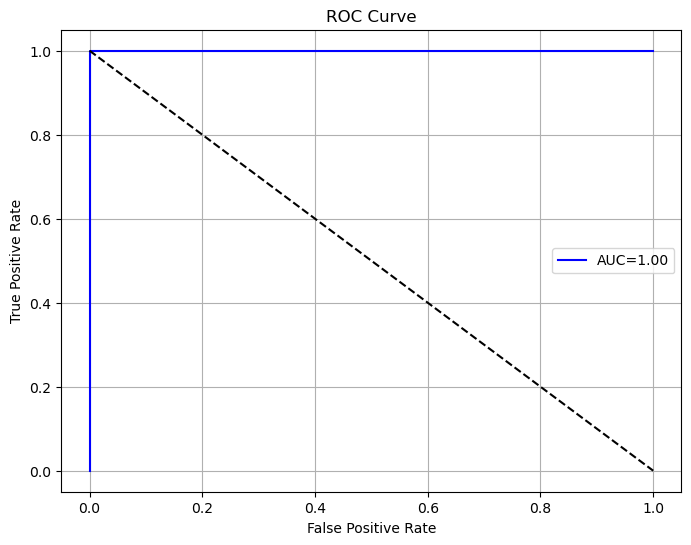

In [44]:
fpr,tpr,_=roc_curve(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'AUC={auc:.2f}',color='blue')
plt.plot([0,1],[1,0],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

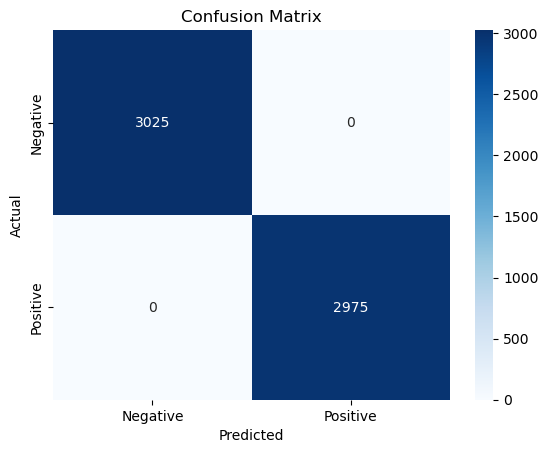

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Topic Modeling using LDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [53]:
data = {
    "text": [
        "Apple is planning to release a new iPhone this fall.",
        "The government announced new policies on healthcare and education.",
        "Scientists discovered a new planet in a faraway galaxy.",
        "Google and Microsoft are competing in the AI race.",
        "NASA is preparing a new mission to explore the Moon.",
        "Stock markets fell after economic uncertainty.",
        "OpenAI released a powerful new language model.",
        "Elon Musk announced plans for a new Tesla factory in India.",
        "Education technology is evolving with AI-based personalized learning.",
        "Climate change remains a major issue for world leaders."
    ]
}
df = pd.DataFrame(data)
df

,text
0,Apple is planning to release a new iPhone this...
1,The government announced new policies on healt...
2,Scientists discovered a new planet in a farawa...
3,Google and Microsoft are competing in the AI r...
4,NASA is preparing a new mission to explore the...
5,Stock markets fell after economic uncertainty.
6,OpenAI released a powerful new language model.
7,Elon Musk announced plans for a new Tesla fact...
8,Education technology is evolving with AI-based...
9,Climate change remains a major issue for world...


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation

In [55]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
df['text']=df['text'].str.lower()

In [57]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai r...
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty.
6,openai released a powerful new language model.
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with ai-based...
9,climate change remains a major issue for world...


In [58]:
import re
def remove_html_tag(text):
    p=re.compile('<.*?>')
    return p.sub('',text)

In [59]:
df['text']=df['text'].apply(remove_html_tag)

In [60]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai r...
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty.
6,openai released a powerful new language model.
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with ai-based...
9,climate change remains a major issue for world...


In [61]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

In [63]:
df['text']=df['text'].apply(remove_punc)

In [65]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai race
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty
6,openai released a powerful new language model
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with aibased ...
9,climate change remains a major issue for world...


In [66]:
def remove_stopwords(text):
    result=[]
    for word in text.split():
        if word in stopwords.words('english'):
            result.append('')
        else:
            result.append(word)
    x=result[:]
    result.clear()
    return ''.join(x)

In [67]:
df['text']=df['text'].apply(remove_stopwords)

In [68]:
df

,text
0,appleplanningreleasenewiphonefall
1,governmentannouncednewpolicieshealthcareeducation
2,scientistsdiscoverednewplanetfarawaygalaxy
3,googlemicrosoftcompetingairace
4,nasapreparingnewmissionexploremoon
5,stockmarketsfelleconomicuncertainty
6,openaireleasedpowerfulnewlanguagemodel
7,elonmuskannouncedplansnewteslafactoryindia
8,educationtechnologyevolvingaibasedpersonalized...
9,climatechangeremainsmajorissueworldleaders


In [70]:
vector=CountVectorizer(max_df=0.9,min_df=1,stop_words='english')
x=vector.fit_transform(df['text'])

In [71]:
lda=LatentDirichletAllocation(n_components=3,random_state=42)

In [72]:
lda.fit(x)

LatentDirichletAllocation(n_components=3, random_state=42)

In [74]:
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Show topics
print("\n🔹 Top Words per Topic:")
display_topics(lda, vector.get_feature_names_out(), 7)


🔹 Top Words per Topic:

Topic 1:
googlemicrosoftcompetingairace | scientistsdiscoverednewplanetfarawaygalaxy | governmentannouncednewpolicieshealthcareeducation | openaireleasedpowerfulnewlanguagemodel | stockmarketsfelleconomicuncertainty | elonmuskannouncedplansnewteslafactoryindia | nasapreparingnewmissionexploremoon

Topic 2:
educationtechnologyevolvingaibasedpersonalizedlearning | climatechangeremainsmajorissueworldleaders | stockmarketsfelleconomicuncertainty | elonmuskannouncedplansnewteslafactoryindia | openaireleasedpowerfulnewlanguagemodel | governmentannouncednewpolicieshealthcareeducation | scientistsdiscoverednewplanetfarawaygalaxy

Topic 3:
nasapreparingnewmissionexploremoon | appleplanningreleasenewiphonefall | elonmuskannouncedplansnewteslafactoryindia | stockmarketsfelleconomicuncertainty | governmentannouncednewpolicieshealthcareeducation | openaireleasedpowerfulnewlanguagemodel | scientistsdiscoverednewplanetfarawaygalaxy
